<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Lab13_Nathaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 13**

## **Hecho por: Nathaly Martelo - T00081461**

## *Prueba de la Diferencia entre Dos Medias Poblacionales (Muestras Independientes, Varianzas Desconocidas Iguales) - Método del Valor p*

In [ ]:

# Instalar R y rpy2
!apt-get install -y r-base
!pip install rpy2
# Importar rpy2 para ejecutar código en R
%load_ext rpy2.ipython


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


### **Ejemplo 1: Prueba de dos colas**
Problema: Se quiere comparar el rendimiento promedio en una prueba de dos grupos de estudiantes que utilizaron diferentes métodos de estudio. El grupo 1 ($n=15$) tuvo una media de $\bar{x}_1=82$ y una desviación estándar de $s_1=6$. El grupo 2 ($n=12$) tuvo una media de $\bar{x}_2=78$ y una desviación estándar de $s_2=8$. Asumiendo que las varianzas de las poblaciones son iguales, ¿hay una diferencia significativa en el rendimiento promedio de los dos métodos de estudio a un nivel de significancia de $α=0.05$?

---

## **Solución en Markdown**

* Grupo 1:

  * \$n\_1 = 15\$
  * \$\bar{x}\_1 = 82\$
  * \$s\_1 = 6\$

* Grupo 2:

  * \$n\_2 = 12\$
  * \$\bar{x}\_2 = 78\$
  * \$s\_2 = 8\$

¿Existe una diferencia significativa entre los promedios de los grupos a un nivel de significancia \$\alpha = 0.05\$?

---

### 📌 Hipótesis

* **Hipótesis nula (\$H\_0\$):** \$\mu\_1 = \mu\_2\$ (no hay diferencia entre los métodos)
* **Hipótesis alternativa (\$H\_1\$):** \$\mu\_1 \ne \mu\_2\$ (hay diferencia entre los métodos)

---

### 🧮 Paso 1: Calcular la varianza combinada (pooled variance)

Como se asume igualdad de varianzas:

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
= \frac{(15 - 1) \cdot 6^2 + (12 - 1) \cdot 8^2}{15 + 12 - 2}
= \frac{14 \cdot 36 + 11 \cdot 64}{25}
= \frac{504 + 704}{25} = \frac{1208}{25} = 48.32
$$

---

### 🧮 Paso 2: Calcular el estadístico de prueba t

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_p^2 \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
= \frac{82 - 78}{\sqrt{48.32 \left(\frac{1}{15} + \frac{1}{12}\right)}}
= \frac{4}{\sqrt{48.32 \cdot \left(\frac{4 + 5}{60}\right)}}
= \frac{4}{\sqrt{48.32 \cdot \frac{9}{60}}}
= \frac{4}{\sqrt{7.248}} \approx \frac{4}{2.692} \approx 1.486
$$

---

### 📉 Paso 3: Grados de libertad y valor crítico

* Grados de libertad:
  \$df = n\_1 + n\_2 - 2 = 25\$
* Nivel de significancia: \$\alpha = 0.05\$ (dos colas)
* Valor crítico:
  \$t\_{0.025, 25} \approx \pm 2.060\$

---

### 🧾 Paso 4: Decisión

* Estadístico calculado: \$t \approx 1.486\$
* Región crítica: \$|t| > 2.060\$
* Como \$|1.486| < 2.060\$, **no se rechaza** la hipótesis nula.

---

### ✅ Conclusión

**No hay evidencia suficiente** para afirmar que existe una diferencia significativa entre los promedios de rendimiento de los dos grupos de estudiantes, a un nivel de significancia de \$\alpha = 0.05\$.

---


## **Solución en R**

--- Resultados de la prueba t ---
Varianza combinada (sp²): 48.320
Desviación estándar combinada (sp): 6.951
Diferencia de medias: 4.00
Error estándar: 2.692

Estadístico t: 1.486
Valores críticos: ±2.060
Valor p: 0.1498

Conclusión: No rechazamos H0 (p = 0.14984 > α = 0.05 )
No hay evidencia suficiente de diferencia entre las medias poblacionales

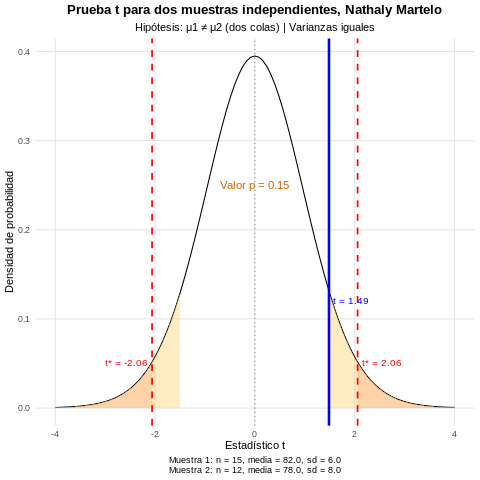

In [ ]:
%%R

# Datos
media_muestra1 <- 82
sd_muestra1 <- 6
n1 <- 15
media_muestra2 <- 78
sd_muestra2 <- 8
n2 <- 12
alfa <- 0.05
gl <- n1 + n2 - 2  # Grados de libertad

# 1. Cálculos preliminares
sp_cuadrado <- ((n1 - 1) * sd_muestra1^2 + (n2 - 1) * sd_muestra2^2) / gl
sp <- sqrt(sp_cuadrado)
error_estandar <- sp * sqrt(1/n1 + 1/n2)
diferencia <- media_muestra1 - media_muestra2

cat("--- Resultados de la prueba t ---\n")

cat(sprintf("Varianza combinada (sp²): %.3f\n", sp_cuadrado))

cat(sprintf("Desviación estándar combinada (sp): %.3f\n", sp))

cat(sprintf("Diferencia de medias: %.2f\n", diferencia))

cat(sprintf("Error estándar: %.3f\n", error_estandar))

# 2. Estadístico de prueba y valor p
t_estadistico <- diferencia / error_estandar
t_critico <- qt(1 - alfa/2, df = gl)
p_valor <- 2 * pt(abs(t_estadistico), df = gl, lower.tail = FALSE)

cat(sprintf("\nEstadístico t: %.3f\n", t_estadistico))

cat(sprintf("Valores críticos: ±%.3f\n", t_critico))

cat(sprintf("Valor p: %.4f\n", p_valor))

# 3. Decisión
if(p_valor <= alfa) {
  cat("\nConclusión: Rechazamos H0 (p =", format.pval(p_valor), "< α =", alfa, ")")
  cat("\nExiste evidencia significativa de diferencia entre las medias poblacionales")
} else {
  cat("\nConclusión: No rechazamos H0 (p =", format.pval(p_valor), "> α =", alfa, ")")
  cat("\nNo hay evidencia suficiente de diferencia entre las medias poblacionales")
}

# 4. Visualización mejorada
library(ggplot2)

# Ajustar límites del gráfico
x_lim <- max(4, abs(t_estadistico) + 1, t_critico + 1)
x_vals <- seq(-x_lim, x_lim, length.out = 500)

ggplot(data.frame(x = x_vals), aes(x = x)) +
  # Distribución t
  stat_function(fun = dt, args = list(df = gl)) +

  # Regiones críticas (rojo)
  geom_area(data = subset(data.frame(x = x_vals), x < -t_critico),
            aes(y = dt(x, df = gl)), fill = "#FF6B6B", alpha = 0.3) +
  geom_area(data = subset(data.frame(x = x_vals), x > t_critico),
            aes(y = dt(x, df = gl)), fill = "#FF6B6B", alpha = 0.3) +

  # Valor p (amarillo)
  geom_area(data = subset(data.frame(x = x_vals), x < -abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "#FFD166", alpha = 0.4) +
  geom_area(data = subset(data.frame(x = x_vals), x > abs(t_estadistico)),
            aes(y = dt(x, df = gl)), fill = "#FFD166", alpha = 0.4) +

  # Líneas de referencia
  geom_vline(xintercept = c(-t_critico, t_critico),
             linetype = "dashed", color = "red", linewidth = 0.8) +
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1.2) +
  geom_vline(xintercept = 0, color = "gray50", linetype = "dotted") +

  # Anotaciones
  annotate("text", x = -t_critico, y = 0.05,
           label = paste("t* =", round(-t_critico, 2)),
           color = "red", hjust = 1.1, size = 3.5) +
  annotate("text", x = t_critico, y = 0.05,
           label = paste("t* =", round(t_critico, 2)),
           color = "red", hjust = -0.1, size = 3.5) +
  annotate("text", x = t_estadistico, y = 0.12,
           label = paste("t =", round(t_estadistico, 2)),
           color = "blue", hjust = ifelse(t_estadistico > 0, -0.1, 1.1), size = 3.5) +
  annotate("text", x = 0, y = 0.25,
           label = paste("Valor p =", format.pval(p_valor, digits = 3)),
           color = "darkorange3", size = 4) +

  # Configuración del gráfico
  labs(title = "Prueba t para dos muestras independientes, Nathaly Martelo",
       subtitle = "Hipótesis: μ1 ≠ μ2 (dos colas) | Varianzas iguales",
       x = "Estadístico t",
       y = "Densidad de probabilidad",
       caption = sprintf("Muestra 1: n = %d, media = %.1f, sd = %.1f\nMuestra 2: n = %d, media = %.1f, sd = %.1f",
                        n1, media_muestra1, sd_muestra1, n2, media_muestra2, sd_muestra2)) +

  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5, size = 9),
        panel.grid.major = element_line(color = "gray90"),
        panel.grid.minor = element_blank())

## **Solución en Python**

Varianza combinada (sp²): 48.320
Desviación estándar combinada (sp): 6.951
Diferencia de medias: 4.00
Error estándar: 2.692

Estadístico t: 1.486
Valores críticos: ±2.060
Valor p: 0.1498

Conclusión: No rechazamos H0 (p = 0.1498 > α = 0.05)
No hay evidencia suficiente de diferencia entre las medias poblacionales


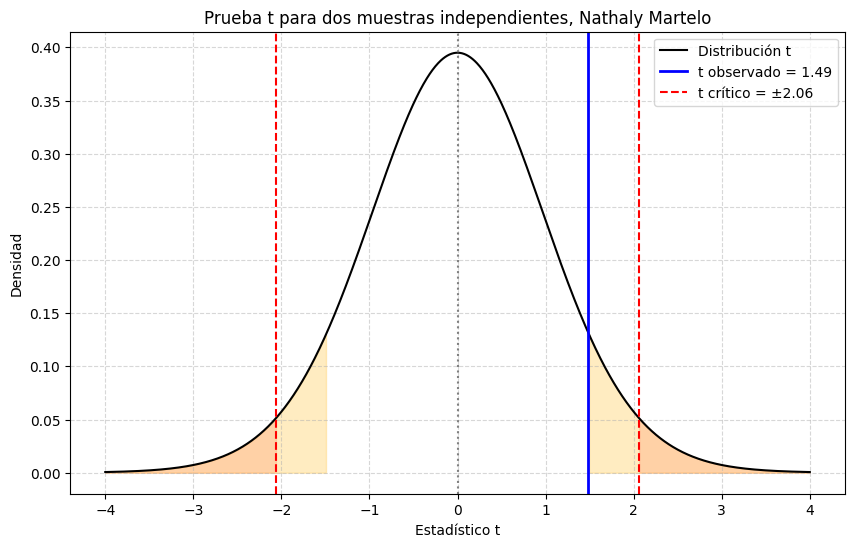

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
media1 = 82
sd1 = 6
n1 = 15

media2 = 78
sd2 = 8
n2 = 12

alpha = 0.05
gl = n1 + n2 - 2  # grados de libertad

# Cálculos preliminares
sp_squared = (((n1 - 1) * sd1**2) + ((n2 - 1) * sd2**2)) / gl
sp = np.sqrt(sp_squared)
error_estandar = sp * np.sqrt(1/n1 + 1/n2)
diferencia = media1 - media2

# Estadístico t
t_estadistico = diferencia / error_estandar
t_critico = stats.t.ppf(1 - alpha/2, df=gl)
p_valor = 2 * stats.t.sf(np.abs(t_estadistico), df=gl)

# Resultados
print(f"Varianza combinada (sp²): {sp_squared:.3f}")
print(f"Desviación estándar combinada (sp): {sp:.3f}")
print(f"Diferencia de medias: {diferencia:.2f}")
print(f"Error estándar: {error_estandar:.3f}")
print(f"\nEstadístico t: {t_estadistico:.3f}")
print(f"Valores críticos: ±{t_critico:.3f}")
print(f"Valor p: {p_valor:.4f}")

if p_valor <= alpha:
    print(f"\nConclusión: Rechazamos H0 (p = {p_valor:.4f} < α = {alpha})")
    print("Existe evidencia significativa de diferencia entre las medias poblacionales")
else:
    print(f"\nConclusión: No rechazamos H0 (p = {p_valor:.4f} > α = {alpha})")
    print("No hay evidencia suficiente de diferencia entre las medias poblacionales")

# Visualización
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución t", color="black")
plt.fill_between(x, y, where=(x < -t_critico), color="#FF6B6B", alpha=0.3)
plt.fill_between(x, y, where=(x > t_critico), color="#FF6B6B", alpha=0.3)
plt.fill_between(x, y, where=(x < -abs(t_estadistico)), color="#FFD166", alpha=0.4)
plt.fill_between(x, y, where=(x > abs(t_estadistico)), color="#FFD166", alpha=0.4)
plt.axvline(x=t_estadistico, color='blue', label=f't observado = {t_estadistico:.2f}', linewidth=2)
plt.axvline(x=-t_critico, linestyle='--', color='red', label=f't crítico = ±{t_critico:.2f}')
plt.axvline(x=t_critico, linestyle='--', color='red')
plt.axvline(x=0, linestyle=':', color='gray')
plt.title("Prueba t para dos muestras independientes, Nathaly Martelo")
plt.xlabel("Estadístico t")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **Ejemplo 4: Prueba con hipótesis nula diferente de cero**
Problema: Una compañía afirma que la diferencia en el tiempo promedio de ensamblaje de un producto utilizando dos métodos diferentes es de al menos 5 minutos (Método 1 - Método 2 ≥5). Se toman muestras: Método 1 ($n=18, \bar{x}_1=32 min, s1=4 min$) y Método 2 ($n=20, \bar{x}_2=26 min, s2=5 min$). Asumiendo varianzas iguales, ¿hay evidencia suficiente para rechazar la afirmación de la compañía a un nivel de significancia de $α=0.10$?

---
## **Solución en Markdown**

* Método 1: \$n\_1 = 18\$, \$\bar{x}\_1 = 32\$ minutos, \$s\_1 = 4\$ minutos
* Método 2: \$n\_2 = 20\$, \$\bar{x}\_2 = 26\$ minutos, \$s\_2 = 5\$ minutos

Nivel de significancia: \$\alpha = 0.10\$
Asumimos que las varianzas poblacionales son iguales. ¿Hay evidencia suficiente para **rechazar la afirmación** de la compañía?

---

### **1. Hipótesis**

Queremos verificar si la diferencia real es **menor** que 5 minutos, es decir, estamos en una prueba **unilateral a la izquierda**.

* Hipótesis nula: \$H\_0: \mu\_1 - \mu\_2 \geq 5\$
* Hipótesis alternativa: \$H\_a: \mu\_1 - \mu\_2 < 5\$

Esto equivale a probar:

$$
H_0: \mu_d = 5 \quad \text{vs.} \quad H_a: \mu_d < 5
$$

---

### **2. Estadístico de prueba**

La diferencia muestral es:

$$
\bar{x}_1 - \bar{x}_2 = 32 - 26 = 6
$$

Grados de libertad:

$$
gl = n_1 + n_2 - 2 = 18 + 20 - 2 = 36
$$

Varianza combinada:

$$
s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{gl} = \frac{(17)(4^2) + (19)(5^2)}{36} = \frac{272 + 475}{36} = \frac{747}{36} \approx 20.75
$$

Desviación estándar combinada:

$$
s_p = \sqrt{20.75} \approx 4.554
$$

Error estándar de la diferencia:

$$
SE = s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} = 4.554 \cdot \sqrt{\frac{1}{18} + \frac{1}{20}} \approx 1.449
$$

Estadístico t:

$$
t = \frac{(\bar{x}_1 - \bar{x}_2) - 5}{SE} = \frac{6 - 5}{1.449} \approx 0.690
$$

---

### **3. Valor crítico y valor p**

Como es una **prueba unilateral a la izquierda**:

* Valor crítico: \$t\_{0.10, 36} \approx -1.306\$
* Valor p:

$$
p\text{-valor} = P(T < 0.690) = 1 - P(T > 0.690) = 1 - 0.246 = 0.754
$$

---

### **4. Decisión**

Dado que:

* \$t = 0.690 > -1.306\$
* \$p = 0.754 > \alpha = 0.10\$

**No rechazamos \$H\_0\$**.

---

###  **Conclusión:**

A un nivel de significancia del 10%, **no hay evidencia suficiente para rechazar la afirmación de la compañía**. No se puede concluir que la diferencia en tiempos de ensamblaje sea menor a 5 minutos.

---

## **Solución en R**

--- Resultados de la prueba t ---
Varianza combinada (sp²): 20.750
Desviación estándar combinada (sp): 4.555
Diferencia observada: 6.00
Diferencia hipotética (μ_diff0): 5.00
Error estándar: 1.480

Estadístico t: 0.676
Valor crítico: -1.306
Valor p: 0.7482

Conclusión: No rechazamos H0 (p = 0.74822 > α = 0.1 )
No hay evidencia suficiente para concluir que μ1 - μ2 < 5

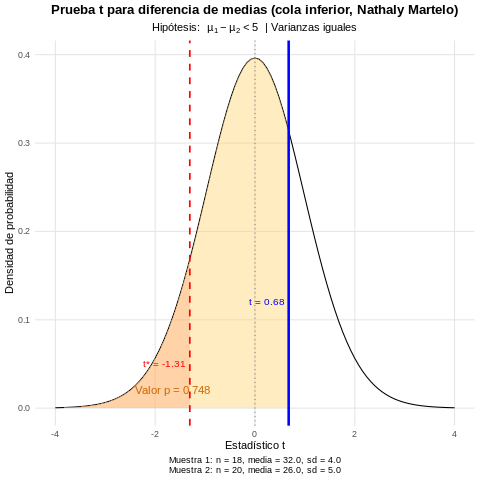

In [ ]:
%%R
# Datos
media_muestra1 <- 32
sd_muestra1 <- 4
n1 <- 18
media_muestra2 <- 26
sd_muestra2 <- 5
n2 <- 20
mu_diff0 <- 5  # Diferencia hipotética bajo H0
alfa <- 0.10
gl <- n1 + n2 - 2

# 1. Cálculos preliminares
sp_cuadrado <- ((n1 - 1) * sd_muestra1^2 + (n2 - 1) * sd_muestra2^2) / gl
sp <- sqrt(sp_cuadrado)
error_estandar <- sp * sqrt(1/n1 + 1/n2)
diferencia_observada <- media_muestra1 - media_muestra2

cat("--- Resultados de la prueba t ---\n")

cat(sprintf("Varianza combinada (sp²): %.3f\n", sp_cuadrado))

cat(sprintf("Desviación estándar combinada (sp): %.3f\n", sp))

cat(sprintf("Diferencia observada: %.2f\n", diferencia_observada))

cat(sprintf("Diferencia hipotética (μ_diff0): %.2f\n", mu_diff0))

cat(sprintf("Error estándar: %.3f\n", error_estandar))

# 2. Estadístico de prueba y valor p
t_estadistico <- (diferencia_observada - mu_diff0) / error_estandar
t_critico <- qt(alfa, df = gl)  # Valor crítico para cola inferior
p_valor <- pt(t_estadistico, df = gl)  # Cola inferior

cat(sprintf("\nEstadístico t: %.3f\n", t_estadistico))

cat(sprintf("Valor crítico: %.3f\n", t_critico))

cat(sprintf("Valor p: %.4f\n", p_valor))

# 3. Decisión
if(p_valor <= alfa) {
  cat("\nConclusión: Rechazamos H0 (p =", format.pval(p_valor), "≤ α =", alfa, ")")
  cat("\nHay evidencia suficiente para concluir que μ1 - μ2 <", mu_diff0)
} else {
  cat("\nConclusión: No rechazamos H0 (p =", format.pval(p_valor), "> α =", alfa, ")")
  cat("\nNo hay evidencia suficiente para concluir que μ1 - μ2 <", mu_diff0)
}

# 4. Visualización mejorada
library(ggplot2)

# Ajustar límites del gráfico dinámicamente
x_lim_inf <- min(-4, t_estadistico - 1, t_critico - 1)
x_lim_sup <- max(4, -t_estadistico + 1)
x_vals <- seq(x_lim_inf, x_lim_sup, length.out = 500)

ggplot(data.frame(x = x_vals), aes(x = x)) +
  # Distribución t
  stat_function(fun = dt, args = list(df = gl)) +

  # Región crítica (rojo - cola inferior)
  geom_area(data = subset(data.frame(x = x_vals), x < t_critico),
            aes(y = dt(x, df = gl)), fill = "#FF6B6B", alpha = 0.3) +

  # Valor p (amarillo)
  geom_area(data = subset(data.frame(x = x_vals), x < t_estadistico),
            aes(y = dt(x, df = gl)), fill = "#FFD166", alpha = 0.4) +

  # Líneas de referencia
  geom_vline(xintercept = t_critico, linetype = "dashed", color = "red", linewidth = 0.8) +
  geom_vline(xintercept = t_estadistico, color = "blue", linewidth = 1.2) +
  geom_vline(xintercept = 0, color = "gray50", linetype = "dotted") +

  # Anotaciones
  annotate("text", x = t_critico, y = 0.05,
           label = paste("t* =", round(t_critico, 2)),
           color = "red", hjust = 1.1, size = 3.5) +

  annotate("text", x = t_estadistico, y = 0.12,
           label = paste("t =", round(t_estadistico, 2)),
           color = "blue", hjust = ifelse(t_estadistico < 0, -0.1, 1.1), size = 3.5) +

  annotate("text", x = mean(c(x_lim_inf, t_estadistico)), y = 0.02,
           label = paste("Valor p =", format.pval(p_valor, digits = 3)),
           color = "darkorange3", size = 4) +

  # Configuración del gráfico
  labs(title = "Prueba t para diferencia de medias (cola inferior, Nathaly Martelo)",
       subtitle = bquote("Hipótesis:" ~ mu[1] - mu[2] < .(mu_diff0) ~ "| Varianzas iguales"),
       x = "Estadístico t",
       y = "Densidad de probabilidad",
       caption = sprintf("Muestra 1: n = %d, media = %.1f, sd = %.1f\nMuestra 2: n = %d, media = %.1f, sd = %.1f",
                        n1, media_muestra1, sd_muestra1, n2, media_muestra2, sd_muestra2)) +

  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5, size = 9),
        panel.grid.major = element_line(color = "gray90"),
        panel.grid.minor = element_blank())

## **Solución en Python**

--- Resultados de la prueba t ---
Varianza combinada (sp²): 20.750
Desviación estándar combinada (sp): 4.555
Diferencia observada: 6.00
Diferencia hipotética (μ_diff0): 5.00
Error estándar: 1.480

Estadístico t: 0.676
Valor crítico: -1.306
Valor p: 0.7482

Conclusión: No rechazamos H0 (p = 0.7482 > α = 0.1)
No hay evidencia suficiente para concluir que μ1 - μ2 < 5


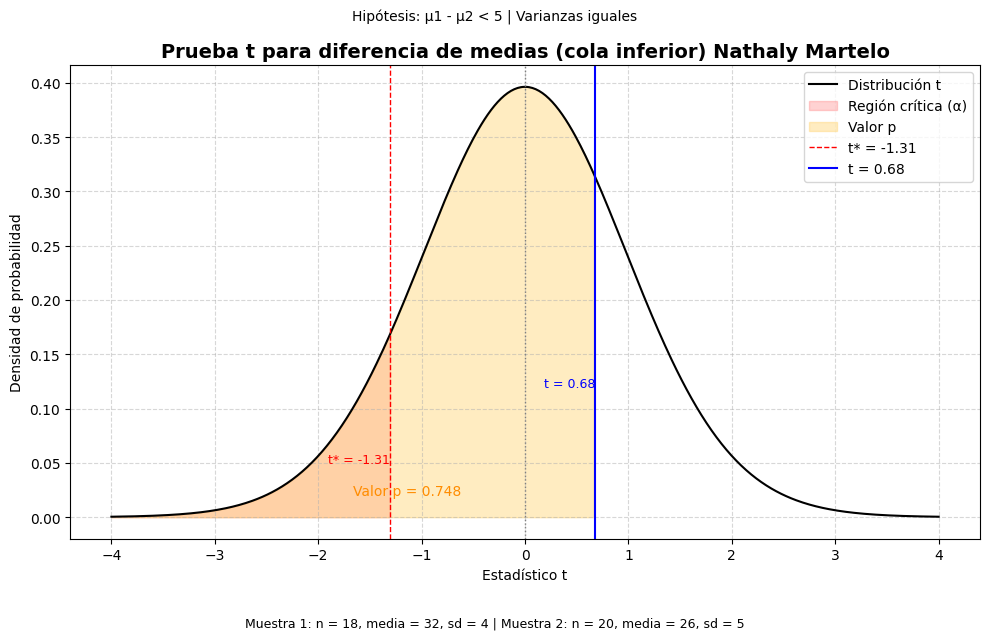

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datos
media_muestra1 = 32
sd_muestra1 = 4
n1 = 18
media_muestra2 = 26
sd_muestra2 = 5
n2 = 20
mu_diff0 = 5  # Diferencia hipotética bajo H0
alfa = 0.10
gl = n1 + n2 - 2

# 1. Cálculos preliminares
sp_cuadrado = ((n1 - 1) * sd_muestra1**2 + (n2 - 1) * sd_muestra2**2) / gl
sp = np.sqrt(sp_cuadrado)
error_estandar = sp * np.sqrt(1/n1 + 1/n2)
diferencia_observada = media_muestra1 - media_muestra2

print("--- Resultados de la prueba t ---")
print(f"Varianza combinada (sp²): {sp_cuadrado:.3f}")
print(f"Desviación estándar combinada (sp): {sp:.3f}")
print(f"Diferencia observada: {diferencia_observada:.2f}")
print(f"Diferencia hipotética (μ_diff0): {mu_diff0:.2f}")
print(f"Error estándar: {error_estandar:.3f}")

# 2. Estadístico de prueba y valor p
t_estadistico = (diferencia_observada - mu_diff0) / error_estandar
t_critico = stats.t.ppf(alfa, df=gl)  # Valor crítico (cola inferior)
p_valor = stats.t.cdf(t_estadistico, df=gl)

print(f"\nEstadístico t: {t_estadistico:.3f}")
print(f"Valor crítico: {t_critico:.3f}")
print(f"Valor p: {p_valor:.4f}")

# 3. Decisión
if p_valor <= alfa:
    print(f"\nConclusión: Rechazamos H0 (p = {p_valor:.4f} ≤ α = {alfa})")
    print(f"Hay evidencia suficiente para concluir que μ1 - μ2 < {mu_diff0}")
else:
    print(f"\nConclusión: No rechazamos H0 (p = {p_valor:.4f} > α = {alfa})")
    print(f"No hay evidencia suficiente para concluir que μ1 - μ2 < {mu_diff0}")

# 4. Visualización
x_lim_inf = min(-4, t_estadistico - 1, t_critico - 1)
x_lim_sup = max(4, -t_estadistico + 1)
x_vals = np.linspace(x_lim_inf, x_lim_sup, 500)
y_vals = stats.t.pdf(x_vals, df=gl)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Distribución t', color='black')

# Región crítica (rojo)
x_crit = x_vals[x_vals < t_critico]
plt.fill_between(x_crit, stats.t.pdf(x_crit, df=gl), color='#FF6B6B', alpha=0.3, label='Región crítica (α)')

# Valor p (amarillo)
x_p = x_vals[x_vals < t_estadistico]
plt.fill_between(x_p, stats.t.pdf(x_p, df=gl), color='#FFD166', alpha=0.4, label='Valor p')

# Líneas verticales
plt.axvline(t_critico, color='red', linestyle='--', linewidth=1, label=f't* = {t_critico:.2f}')
plt.axvline(t_estadistico, color='blue', linewidth=1.5, label=f't = {t_estadistico:.2f}')
plt.axvline(0, color='gray', linestyle=':', linewidth=1)

# Anotaciones
plt.text(t_critico, 0.05, f't* = {t_critico:.2f}', color='red', ha='right', fontsize=9)
plt.text(t_estadistico, 0.12, f't = {t_estadistico:.2f}', color='blue', ha='left' if t_estadistico < 0 else 'right', fontsize=9)
plt.text((x_lim_inf + t_estadistico)/2, 0.02, f'Valor p = {p_valor:.3f}', color='darkorange', fontsize=10)

# Configuración del gráfico
plt.title('Prueba t para diferencia de medias (cola inferior) Nathaly Martelo', fontsize=14, fontweight='bold')
plt.suptitle(f"Hipótesis: μ1 - μ2 < {mu_diff0} | Varianzas iguales", fontsize=10)
plt.xlabel('Estadístico t')
plt.ylabel('Densidad de probabilidad')
plt.figtext(0.5, -0.05,
            f"Muestra 1: n = {n1}, media = {media_muestra1}, sd = {sd_muestra1} | "
            f"Muestra 2: n = {n2}, media = {media_muestra2}, sd = {sd_muestra2}",
            ha="center", fontsize=9)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
